In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
train_data = pd.read_csv("/kaggle/input/foogg-data/train_set.csv")
test_data = pd.read_csv("/kaggle/input/foogg-data/test_set.csv")
val_data = pd.read_csv("/kaggle/input/foogg-data/val_set.csv")

In [34]:
train_data.columns

Index(['date_time_IST', 'tmpc', 'dwpc', 'relh', 'drct', 'wspeedkm', 'pressure',
       'vsbykm', 'feelc', 'cos_min_time', 'sin_min_time', 'fog_time',
       'fog_month', 'diff_tempc_dwpc', '30min_vsby_km', '1hr_vsby_km',
       '1.5hr_vsby_km', '2hr_vsby_km', '2.5hr_vsby_km', '3hr_vsby_km',
       '6hr_vsby_km', '30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond'],
      dtype='object')

In [35]:
train_data=train_data.drop(columns=[ '30min_vsby_km', '1hr_vsby_km',
       '1.5hr_vsby_km', '2hr_vsby_km', '2.5hr_vsby_km', 
       '6hr_vsby_km', '30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type','3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST'])
val_data = val_data.drop(columns=[ '30min_vsby_km', '1hr_vsby_km',
       '1.5hr_vsby_km', '2hr_vsby_km', '2.5hr_vsby_km', 
       '6hr_vsby_km', '30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type','3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST'])
test_data =test_data.drop(columns=[ '30min_vsby_km', '1hr_vsby_km',
       '1.5hr_vsby_km', '2hr_vsby_km', '2.5hr_vsby_km', 
       '6hr_vsby_km', '30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type','3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST'])

In [36]:
train_data.columns

Index(['tmpc', 'dwpc', 'relh', 'drct', 'wspeedkm', 'pressure', 'vsbykm',
       'feelc', 'cos_min_time', 'sin_min_time', 'fog_time', 'fog_month',
       'diff_tempc_dwpc', '3hr_vsby_km'],
      dtype='object')

In [37]:
train_data.columns.get_loc('3hr_vsby_km')

13

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)
val_scaled = scaler.transform(val_data)

In [40]:
def create_seq(df,seq_len):
        sequences = []        
        for i in range (len(df) - seq_len):
            sequences.append(df[i:i+seq_len,:13])
        return np.array(sequences)

In [65]:
seq_len = 6
X_train = create_seq(train_scaled,seq_len)
X_test = create_seq(test_scaled,seq_len)
X_val = create_seq(val_scaled,seq_len)

In [66]:
target_index = 13

In [67]:
y_train = train_scaled[seq_len: , target_index]
y_test = test_scaled[seq_len: , target_index]
y_val = val_scaled[seq_len: , target_index]

In [68]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Activation,Dropout
from keras.callbacks import EarlyStopping

In [69]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(seq_len, 13)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(1, activation='relu'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
model.compile(optimizer= Adam(learning_rate = 0.001), loss='mse')

In [71]:
model.fit(X_train, y_train, epochs=50, batch_size=64,validation_data=(X_val, y_val))

Epoch 1/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0362 - val_loss: 0.0141
Epoch 2/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0194 - val_loss: 0.0117
Epoch 3/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0181 - val_loss: 0.0126
Epoch 4/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0177 - val_loss: 0.0106
Epoch 5/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0174 - val_loss: 0.0146
Epoch 6/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0172 - val_loss: 0.0111
Epoch 7/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0172 - val_loss: 0.0118
Epoch 8/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0168 - val_loss: 0.0116
Epoch 9/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0166 - val_loss: 0.0107
Epoch 10/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0166 - val_loss: 0.0118
Epoch 11/50
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0164 - val_loss: 0.0119
Epoch 12/50
1233/1233 ━━━━━━━

In [72]:
test_predictions = model.predict(X_test)

690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [73]:
target_scaler = MinMaxScaler()
target_scaler.fit(train_data.iloc[:, 13].values.reshape(-1, 1))

MinMaxScaler()

In [74]:
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_inv = target_scaler.inverse_transform(test_predictions).flatten()

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mse = mean_squared_error(y_test_inv, test_predictions_inv)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 0.3118181245335105
RMSE: 0.5584067733592695


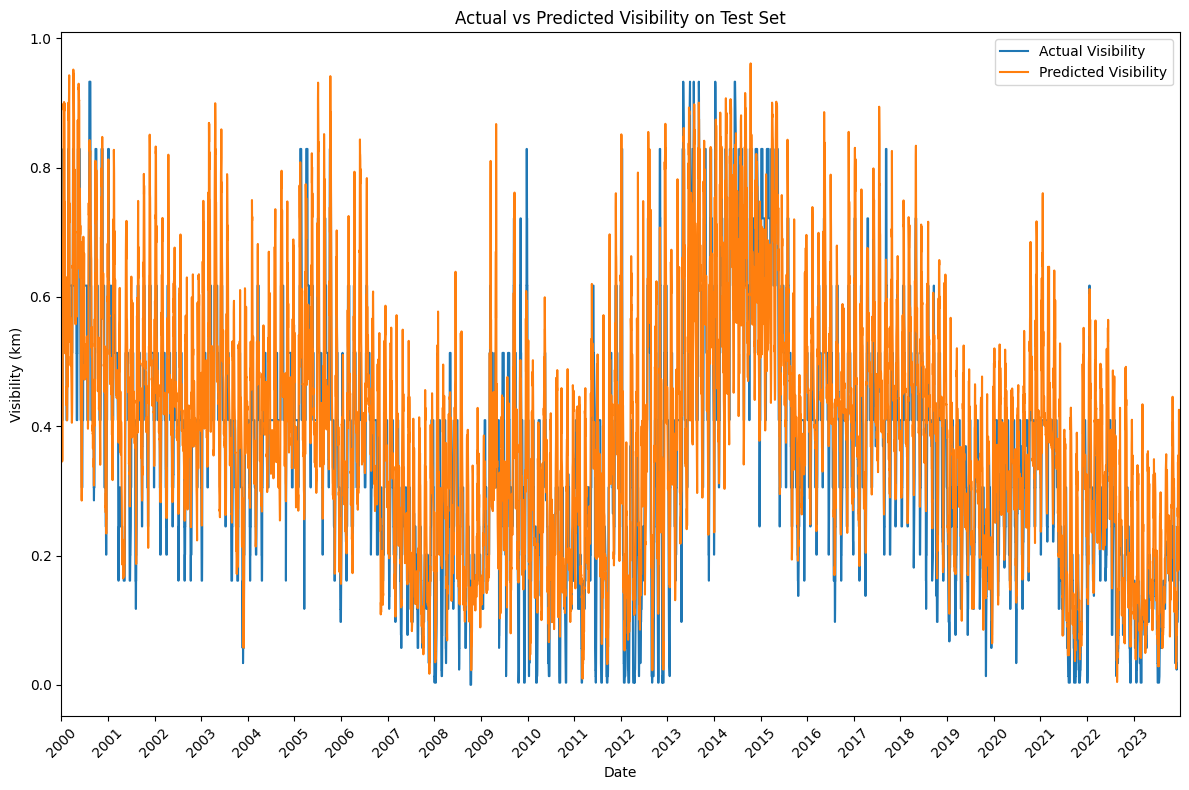

In [77]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))  # Adjusting the size of the graph
plt.plot(y_test, label='Actual Visibility')
plt.plot(test_predictions, label='Predicted Visibility')
plt.title('Actual vs Predicted Visibility on Test Set')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')

# Setting yearly intervals on the x-axis from 2000 to 2023
years = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Setting the range for the x-axis
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2023-12-31'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend()
plt.tight_layout()
plt.show()

In [78]:
current_visibility = y_test_inv[-1]  # Last value in the actual test data
predicted_next_3hr_visibility = test_predictions_inv[-1]  # Last prediction

# Assuming you have the actual visibility for the next 3 hours in the original test_data
# Adjust the column index if needed to match your data
actual_next_3hr_visibility = test_data.iloc[seq_len:, target_index].values[-1]

print(f'Current Visibility: {current_visibility} km')
print(f'Predicted Visibility for next 3 hours: {predicted_next_3hr_visibility} km')
print(f'Actual Visibility for next 3 hours: {actual_next_3hr_visibility} km')

Current Visibility: 4.0072566 km
Predicted Visibility for next 3 hours: 3.2048654556274414 km
Actual Visibility for next 3 hours: 4.0072566 km
